# Workshop: Arbol de decision modelo de Clasificacion en ScikitLearn

In [1]:
#Se importan librerias nevesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Se importa el archivo a analizar
df = pd.read_csv('titanic.csv', sep=',')

In [3]:
#Primeras 5 filas
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
#Ultimas 5 filas
df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [6]:
print(df.shape)

(887, 8)


In [7]:
df.count()

Survived                   887
Pclass                     887
Name                       887
Sex                        887
Age                        887
Siblings/Spouses Aboard    887
Parents/Children Aboard    887
Fare                       887
dtype: int64

In [8]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
print(df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [40]:
#Separar en X e Y
#X Variables que no son target e Y variables target > X = Variables para producir resultado, Y = Resultado (lo que buscamos)
X = df.drop(['Survived', 'Fare', 'Name'], axis=1)

In [41]:
X.count()


Pclass                     887
Sex                        887
Age                        887
Siblings/Spouses Aboard    887
Parents/Children Aboard    887
dtype: int64

In [42]:
y = df.Survived # Con esto se define el target

In [43]:
#Separar los datos en Train y Test
from sklearn.model_selection import train_test_split #Se importa libreria para separar en train y test
#Se separa en 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [44]:
#Algoritmo de arbol de decision
from sklearn.tree import DecisionTreeClassifier #Se importa el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42)

In [45]:
#Funcion para entrenar el modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [38]:
print(df['Sex'])

0      1
1      2
2      2
3      2
4      1
      ..
882    1
883    2
884    2
885    1
886    1
Name: Sex, Length: 887, dtype: int64


In [30]:
for sex in range(len(df['Sex'])):
    if df['Sex'][sex] == 'male':
        df['Sex'][sex] = 1
    elif df['Sex'][sex] == 'female':
        df['Sex'][sex] = 2
    else:
        df['Sex'][sex]=0

C:\Users\wgsig\AppData\Local\Temp\ipykernel_18748\2256546305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'][sex] = 1
C:\Users\wgsig\AppData\Local\Temp\ipykernel_18748\2256546305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'][sex] = 2


In [31]:
len(df['Sex'])

887

In [32]:
df['Sex'][1]

2

In [37]:

df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                          int64
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [36]:
df['Sex'] = pd.to_numeric(df['Sex'])

In [46]:
y_train_pred = tree.predict(X_train) #Prediccion en train
y_test_pred = tree.predict(X_test) #prediccion en test

In [47]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento: ', train_accuracy)
print('% de aciertos sobre el set de prueba: ', test_accuracy)



% de aciertos sobre el set de entrenamiento:  0.8064516129032258
% de aciertos sobre el set de prueba:  0.7378277153558053


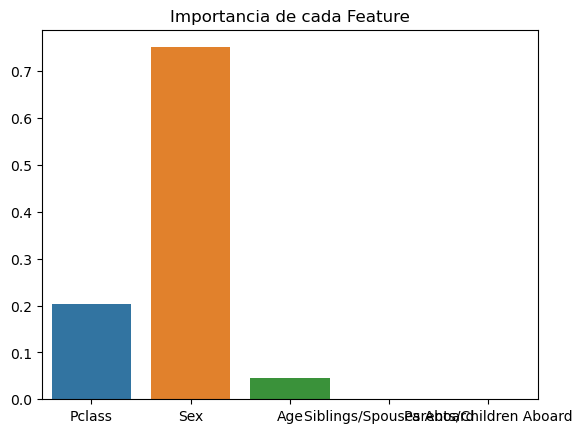

In [51]:
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
#sns.barplot(data=df, x="island", y="body_mass_g")
sns.barplot(x=columns, y=importances)
plt.title('Importancia de cada Feature')
plt.show()